- double lambda(nlambda) ;
		lambda:long_name = "Values of the regularization parameter that were used, in SI units ($Tesla^2 meter^2 / Ampere^2$)" ;
- double chi2_B(nlambda) ;
  chi2_B:long_name = "Values of $\chi^2_B$ (the area integral over the plasma surface of $|B_{normal}|^2$) that resulted for each value of lambda, in SI units ($Tesla^2 meter^2$)" ;
- double chi2_K(nlambda) ;
  chi2_K:long_name = "Values of chi^2_K (the area integral over the coil winding surface of current density squared) that resulted for each value of lambda, in SI units ($Ampere^2$)" ;
- double chi2_Laplace_Beltrami(nlambda) ;
  chi2_Laplace_Beltrami:long_name = "" ;
- double max_Bnormal(nlambda) ;
  max_Bnormal:long_name = "Maximum (over the plasma surface) magnetic field normal to the target plasma shape that resulted for each value of lambda, in $Tesla$." ;
- double max_K(nlambda) ;
  max_K:long_name = "Maximum (over the coil surface) current density that resulted for each value of lambda, in $Amperes/meter$." ;
	

In [1]:
from scipy.io import netcdf_file
import numpy as np
import bdistrib_io
with netcdf_file(bdistrib_io.get_file_path(952, "regcoil"), "r", mmap=False) as f:
  chi2_B = f.variables["chi2_B"][()]
  chi2_K = f.variables["chi2_K"][()]
  chi2_Laplace_Beltrami = f.variables["chi2_Laplace_Beltrami"][()]
  max_Bnormal = f.variables["max_Bnormal"][()]
  Bnormal_total = f.variables["Bnormal_total"][()]
  max_K = f.variables["max_K"][()]
  print(f.variables.keys())


dict_keys(['nfp', 'geometry_option_plasma', 'geometry_option_coil', 'ntheta_plasma', 'nzeta_plasma', 'nzetal_plasma', 'ntheta_coil', 'nzeta_coil', 'nzetal_coil', 'a_plasma', 'a_coil', 'R0_plasma', 'R0_coil', 'mpol_potential', 'ntor_potential', 'mnmax_potential', 'mnmax_plasma', 'mnmax_coil', 'num_basis_functions', 'symmetry_option', 'area_plasma', 'area_coil', 'volume_plasma', 'volume_coil', 'net_poloidal_current_Amperes', 'net_toroidal_current_Amperes', 'curpol', 'nlambda', 'total_time', 'exit_code', 'chi2_B_target', 'sensitivity_option', 'theta_plasma', 'zeta_plasma', 'zetal_plasma', 'theta_coil', 'zeta_coil', 'zetal_coil', 'xm_potential', 'xn_potential', 'xm_plasma', 'xn_plasma', 'xm_coil', 'xn_coil', 'rmnc_plasma', 'zmns_plasma', 'rmnc_coil', 'zmns_coil', 'h', 'RHS_B', 'RHS_regularization', 'lambda', 'chi2_B', 'chi2_K', 'chi2_Laplace_Beltrami', 'max_Bnormal', 'max_K', 'norm_normal_plasma', 'norm_normal_coil', 'Bnormal_from_plasma_current', 'Bnormal_from_net_coil_currents', 'single_

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



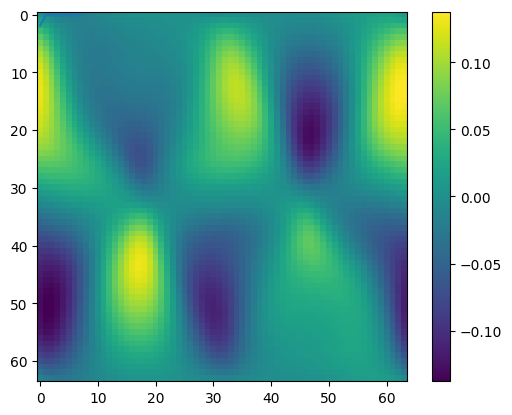

In [2]:
import matplotlib.pyplot as plt
plt.plot(max_Bnormal)
plt.imshow(Bnormal_total[7])
plt.colorbar()


In [3]:
import pandas as pd
unpickled_df = pd.read_pickle("QUASR_db/QA_database_26032024.pkl")
unpickled_df.sort_values(by="ID")


,qs_error,total_coil_length,total_coil_length_threshold,mean_iota,max_kappa,max_msc,nc_per_hp,nfp,aspect_ratio,ID,minor_radius,Nsurfaces,volume
64498,5.074176e-06,35.000036,35.0,0.1,3.768148,3.094313,1,2,19.999985,952,0.050000,1,0.049348
53546,3.109899e-05,35.000174,35.0,0.1,3.398734,2.004414,1,2,9.999963,953,0.100000,2,0.197392
13192,8.577522e-05,35.000431,35.0,0.1,3.294534,1.772975,1,2,6.666613,954,0.150000,3,0.444132
151454,5.977597e-04,35.002510,35.0,0.1,4.023036,2.019909,1,2,3.333200,957,0.300004,6,1.776529
131774,9.073261e-04,35.003572,35.0,0.1,3.989880,2.217159,1,2,2.856976,958,0.350007,7,2.418053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79307,2.765089e-06,120.000032,120.0,0.9,4.859487,5.000016,3,4,20.000509,1114302,0.049999,1,0.049346
44064,3.147952e-04,120.000135,120.0,0.9,4.999878,5.000036,3,4,6.666963,1114304,0.149997,3,0.444122
74418,2.980095e-07,119.999652,120.0,0.9,4.942028,5.000001,3,4,20.000050,1114316,0.050000,1,0.049348
106865,1.328660e-05,120.000040,120.0,0.9,4.992078,5.000004,3,4,10.000117,1114317,0.099999,2,0.197388


In [4]:
import bdistrib_util
import os
import bdistrib_io
import precompute_complexities

max_ID = 1915
max_ID = int(max_ID)

unpickled_df = pd.read_pickle("QUASR_db/QA_database_26032024.pkl")

efficiencies = []
for ID in range(max_ID):
    bdistrib_path = bdistrib_io.get_file_path(ID, "bdistrib")
    if os.path.exists(bdistrib_path):
        results_dict = bdistrib_util.rate_of_efficiency_sequence(bdistrib_path)
        results_dict["ID"] = ID
        efficiencies.append(results_dict)
df = pd.DataFrame(efficiencies)

# Compute coil complexity from coils
def get_complexity(ID):
    return precompute_complexities.cached_get_complexity(ID)

# complexity = [get_complexity(ID) for ID in df["ID"]]
# df = df.join(pd.DataFrame(complexity)).select_dtypes(exclude=["object"])
unpickled_df["complexity"] = unpickled_df["max_kappa"] + unpickled_df["max_msc"]
unpickled_df["log(qs error)"] = np.log(unpickled_df["qs_error"])

df = df.merge(unpickled_df, left_on="ID", right_on="ID")

def get_regcoil(ID):
    from scipy.io import netcdf_file

    with netcdf_file(
        bdistrib_io.get_file_path(ID, "regcoil"), "r", mmap=False
    ) as f:
        regcoil_results = {}
        for key in [
            "lambda",
            "chi2_B",
            "chi2_K",
            "chi2_Laplace_Beltrami",
            "max_Bnormal",
            "max_K",
        ]:
            metric_for_different_lambda = f.variables[key][()]
            regcoil_results[key] = metric_for_different_lambda
            regcoil_results[key + "[-1]"] = metric_for_different_lambda[-1]
            regcoil_results[key + " (linear fit)"] = np.polyfit(
                metric_for_different_lambda,
                np.linspace(0, 1, len(metric_for_different_lambda)),
                1,
            )[0]
        regcoil_results["ID"] = ID
    return regcoil_results
regcoil_df = pd.DataFrame([get_regcoil(ID) for ID in df["ID"]])

df = df.merge(regcoil_df, left_on="ID", right_on="ID").infer_objects()

df


/home/IPP-HGW/juph/efficient-fields/.venv/lib/python3.11/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[key + " (linear fit)"] = np.polyfit(
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[key + " (linear fit)"] = np.polyfit(
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[key + " (linear fit)"] = np.polyfit(
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[key + " (linear fit)"] = np.polyfit(
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[key + " (linear fit)"] = np.polyfit(
/tmp/ipykernel_49695/4045792978.py:49: RankWarning: Polyfit may be poorly conditioned
  regcoil_results[k

,efficiency middle,feasibility middle,efficiency outer,feasibility outer,efficiency transferMatrix,feasibility transferMatrix,ID,qs_error,total_coil_length,total_coil_length_threshold,...,chi2_K (linear fit),chi2_Laplace_Beltrami,chi2_Laplace_Beltrami[-1],chi2_Laplace_Beltrami (linear fit),max_Bnormal,max_Bnormal[-1],max_Bnormal (linear fit),max_K,max_K[-1],max_K (linear fit)
0,-4.164281,-2.221390,-4.164281,-0.536906,-7.081029,-4.123681,952,0.000005,35.000036,35.0,...,-2.604321e-19,"[434412.75003995374, 3.1226700449020835e+21, 1...",8.504110e+15,-1.307095e-22,"[1.8775128348966206, 6.059891385135074e-06, 0....",0.137748,-0.285891,"[18592680.05239206, 2665318910.6103907, 265142...",2.463858e+07,-1.540552e-10
1,-4.547044,-2.553384,-4.547044,-0.593094,-7.275184,-4.184001,953,0.000031,35.000174,35.0,...,1.018328e-15,"[1203621.9706384614, 3.0474655224579628e+16, 9...",7.866923e+15,-8.007733e-18,"[2.3770267062062276, 4.639914166659764e-06, 0....",0.160139,-0.163214,"[18823695.56391238, 28002688.273855228, 281157...",2.691264e+07,3.383446e-08
2,-5.012239,-2.755811,-5.012239,-0.120335,-7.451195,-4.093423,954,0.000086,35.000431,35.0,...,1.495231e-15,"[128140027.5368672, 1.3760704821864062e+16, 1....",1.036930e+16,2.894539e-17,"[2.9442444688796217, 3.895807680009966e-05, 0....",0.183507,-0.183928,"[18677932.972327244, 30724109.124682378, 30737...",2.952595e+07,4.270250e-08
3,-5.075349,-1.559197,-5.075349,2.971369,-0.057991,8.059807,957,0.000598,35.002510,35.0,...,4.365669e-16,"[294665438374.4273, 1.4176223309349408e+17, 4....",3.101662e+16,-2.404213e-18,"[5.579490927486766, 0.06233691299509658, 0.060...",0.240994,-0.100328,"[20674208.414332036, 49597880.87917542, 477298...",4.218482e+07,1.255056e-08
4,-5.034838,-1.008344,-5.034838,3.367596,0.302185,9.321995,958,0.000907,35.003572,35.0,...,1.719355e-19,"[1213895771957.3372, 7.998176922110234e+21]",7.998177e+21,1.250285e-22,"[13.16205412860676, 10.018816141425411]",10.018816,-0.318143,"[22525632.651519172, 7695195378.492751]",7.695195e+09,1.303327e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-5.702343,-1.763309,-5.702343,2.805862,-2.505088,5.848733,1910,0.002385,33.017236,33.0,...,1.718205e-20,"[286635595775.3863, 6.497020861245967e+22]",6.497021e+22,1.539167e-23,"[1724.3676303505101, 9.046581994707143]",9.046582,-0.000583,"[22187711.786056604, 23965596661.038902]",2.396560e+10,4.176515e-11
108,-3.147176,-1.124621,-3.147176,0.268050,-6.340542,-3.564824,1911,0.000055,33.000814,33.0,...,-5.221373e-18,"[24925450811027.4, 5.4164166942475085e+20, 1.8...",1.479212e+16,-7.535571e-22,"[3.18754709934224, 5.746173941667543e-07, 0.01...",0.181760,-0.172893,"[18332896.21846626, 1202133085.126844, 2667133...",2.441365e+07,-3.440142e-10
109,-4.054969,-2.033424,-4.054969,-0.138176,-6.912925,-3.895968,1912,0.000075,33.000505,33.0,...,-5.005242e-17,"[8474251.731653735, 7.878603727944863e+18, 1.3...",1.125637e+16,-5.176576e-20,"[4.21845642544327, 0.00026978364972207736, 0.0...",0.170085,-0.132406,"[18171341.05322411, 214242345.5173619, 2732026...",2.700606e+07,-2.004021e-09
110,-3.795141,-1.578604,-3.795141,0.937015,-7.500837,-4.207893,1913,0.000191,33.001115,33.0,...,-1.847653e-19,"[533615600.08019507, 3.720256795326795e+21, 1....",1.350622e+16,-1.097135e-22,"[4.601635919608206, 0.08459447214906457, 0.081...",0.190688,-0.125487,"[18563765.445272468, 3671744773.6895556, 29253...",2.896799e+07,-1.115040e-10


In [5]:
import bdistrib_io
import regcoil_plot
fig = regcoil_plot.plot_current_contours(bdistrib_io.get_file_path(974, "regcoil"), -1)
fig.show()


In [6]:

fig = regcoil_plot.plot_surfaces(bdistrib_io.get_file_path(952, "regcoil"))
fig[0].show()
fig[1].show()
fig[2].show()
